In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\gagan soni\Downloads\AirPassengers.csv")
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df = df.rename(columns = {'#Passengers':'Passengers'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
df.shape

(144, 2)

In [8]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


## Data Exploration 

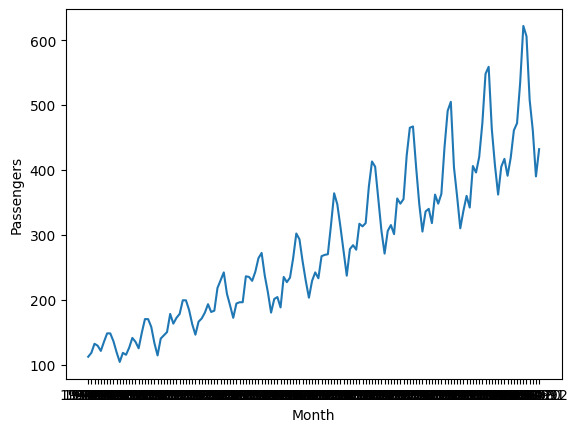

In [9]:
sns.lineplot(x = df.Month , y = df['Passengers'])
plt.show()

## Check For Stationarity

##### Method 1 = Rolling Statistics

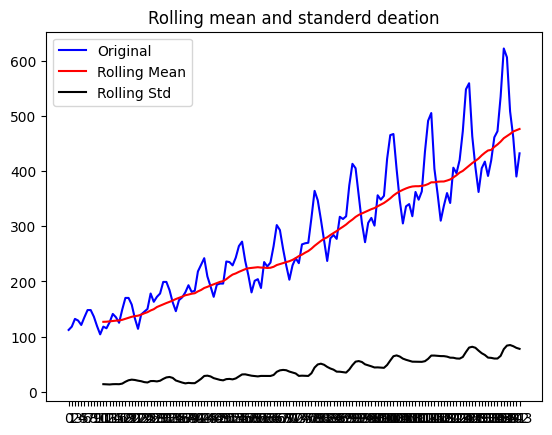

In [10]:
# determine rolling statistics
rolmean = df ['Passengers'].rolling(window = 12).mean() # window of 12 means average of 12 record
rolstd = df['Passengers'].rolling(window = 12).std()

# plot rolling statistics

orig = plt.plot(df['Passengers'],color = 'blue',label = 'Original')
mean = plt.plot(rolmean, color = 'red',label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'black',label = 'Rolling Std')
plt.title('Rolling mean and standerd deation')
plt.xticks(ticks = df.index)
plt.legend()
plt.show()

##### Method 2  = Augmented Dicky Fuller Test
* For the ADF Test
    * H0 : data is non stationality
    * H1 : data is stationarity
* based on p value we will accept or reject HO(if P-value<5% reject null hypothesis)

In [11]:
from statsmodels.tsa.stattools import adfuller
adfuller_result = adfuller(df['Passengers'])
print('p_value',adfuller_result[1])# because we want only p value

p_value 0.991880243437641


#### because of null hypothesis is <0.5 So the data is not stationarity so we have to convert it into satationarity **

## Convert to Stationarity Using differencing

In [12]:
df['diff'] = df['Passengers'] - df['Passengers'].shift(2)

In [17]:
df.dropna(inplace = True)

In [19]:
adfuller_result = adfuller(df['diff'])
print('p value of adf test',adfuller_result[1])

p value of adf test 0.038629757676988535


In [24]:
df.drop(columns = 'Passengers',inplace = True)

In [30]:
df = df.reset_index(drop=True)

#### after data converted the data stationarity you have  to do the train test split

In [47]:
y_train = df['diff'][:114]
y_test  = df['diff'][114:]

# Build Arima Model
* build arima model using p,d,q values
* p is AR value
* d is integration (hyperparameter)
* q is MA value 

### Plot ACF & PACF AND FIND P AND Q PARAMETERS
* AUTO CORRELATION :  A functin which give us value of autocorrelation of any series with its lagged value.
* PARTIAL AUTO CORRELATION : An indirect function to find auto correlation after removing the relationship explained by previous lags

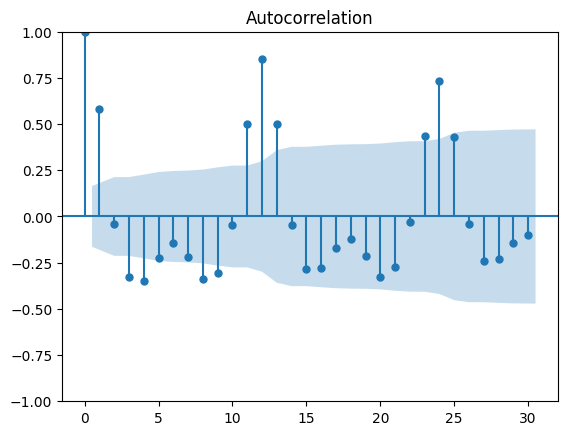

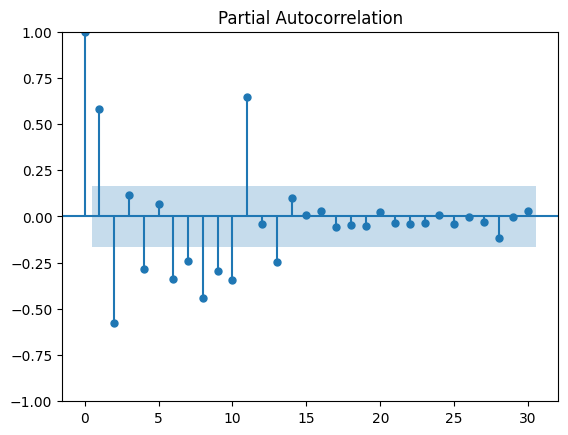

In [36]:
import statsmodels.api as sm
fig = sm.graphics.tsa.plot_acf(df['diff'],lags = 30) # correlation lags next by next 30 record
fig = sm.graphics.tsa.plot_pacf(df['diff'],lags = 30)

## AR Model

In [56]:
# Modelling 
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['diff'],order = (11,0,0))
ARIMA = model.fit()

# prediction
y_pred_train = ARIMA.predict(start = y_train.index[0],end = y_train.index[-1])
from sklearn.metrics import r2_score
print('train r2 score',r2_score(y_pred_train,y_train))
y_pred_test = ARIMA.predict(start = y_test.index[0],end = y_test.index[-1])
print('test r2 score',r2_score(y_pred_test,y_test))

train r2 score 0.9354944953950083
test r2 score 0.9551178133217834


C:\Users\gagan soni\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## MA Model

In [51]:
# Modelling 
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['diff'],order = (0,0,12))
ARIMA = model.fit()

# prediction
y_pred_train = ARIMA.predict(start = y_train.index[0],end = y_train.index[-1])
from sklearn.metrics import r2_score
print('train r2 score',r2_score(y_pred_train,y_train))
y_pred_test = ARIMA.predict(start = y_test.index[0],end = y_test.index[-1])
print('test r2 score',r2_score(y_pred_test,y_test))

train r2 score 0.8419830516223443
test r2 score 0.9070984868142137


C:\Users\gagan soni\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## ARMA Model

In [52]:
# Modelling 
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['diff'],order = (11,0,12))
ARIMA = model.fit()

# prediction
y_pred_train = ARIMA.predict(start = y_train.index[0],end = y_train.index[-1])
from sklearn.metrics import r2_score
print('train r2 score',r2_score(y_pred_train,y_train))
y_pred_test = ARIMA.predict(start = y_test.index[0],end = y_test.index[-1])
print('test r2 score',r2_score(y_pred_test,y_test))

train r2 score 0.938174942640998
test r2 score 0.9658020694998988


C:\Users\gagan soni\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## ARIMA Model

In [53]:
# Modelling 
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['diff'],order = (11,3,12))
ARIMA = model.fit()

# prediction
y_pred_train = ARIMA.predict(start = y_train.index[0],end = y_train.index[-1])
from sklearn.metrics import r2_score
print('train r2 score',r2_score(y_pred_train,y_train))
y_pred_test = ARIMA.predict(start = y_test.index[0],end = y_test.index[-1])
print('test r2 score',r2_score(y_pred_test,y_test))

train r2 score 0.889348856403077
test r2 score 0.9425447690759803


C:\Users\gagan soni\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## SARIMA Model

In [54]:
# Modelling
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df['diff'], seasonal_order=(11, 0, 12, 12))
SARIMAX_model = model.fit()

# Prediction
ypred_train = SARIMAX_model.predict(start=y_train.index[0], end=y_train.index[-1])
ypred_test = SARIMAX_model.predict(start=y_test.index[0], end=y_test.index[-1])

# Evaluation
print("Train R2 of SARIMAX model:", r2_score(ypred_train, y_train))
print("Test R2 of SARIMAX model:", r2_score(ypred_test, y_test))


C:\Users\gagan soni\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Train R2 of SARIMAX model: 0.8956863855937072
Test R2 of SARIMAX model: 0.9496180126900691
